##### Imports

In [1]:
from scripts.toxicity_vect import *
from scripts.plotting import *

c:\Users\User\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Progress tracking

In [ ]:
# track progress for pipeline processing
tqdm.pandas() 

##### Datasets with features (no toxicity)

Real data (no missing values for llm_body)

In [3]:
# real comments
df_real = pd.read_csv("../data/pandora/PANDORA_featextr.csv", encoding = "utf-8")

In [4]:
print(f"Shape of dataset:\n{df_real.shape}\n")
df_real.head(1)

Shape of dataset:
(2710671, 55)



,author,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,score,subreddit,id,parent_id,date,time_of_day,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw
0,MetricExpansion,Those stats come from the test. [Echoing the c...,stats come test echo comment make related ques...,m,23.0,high,very low,very low,low,medium,6.0,mbti,d7vkyrf,t3_53plrw,2016-09-21,03:41:38,25,4,8,0,0,0,,,0.03,0.03,0.0,0.21,0.07,0.41,0.07,0.0,0.0,0.07,0.108117,0.524675,0.135211,0.087877,0.124749,45.59,13.2,14.64,14.3,14.7,11.09,8.62,12.4,30.0,160,94,19,37,31,87,85


Simulated data (ex ante) (no missing values for llm_body)

In [5]:
# simulated data before moderation
df_bef = pd.read_csv("../data/simulator/exante/before_mod/SIMULATOR_exante_bef_featextr.csv", encoding = "utf-8")
# ofsa
df_ofsa = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_ofsa_featextr.csv", encoding = "utf-8")
# neutral
df_neut = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_neut_featextr.csv", encoding = "utf-8")
# empathizing
df_emp = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_emp_featextr.csv", encoding = "utf-8")
# prescriptive
df_pres = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_pres_featextr.csv", encoding = "utf-8")

In [6]:
print(f"Shape of before:\n{df_bef.shape}\n")
df_bef.head(1)

Shape of before:
(3131, 61)



,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,thread_id,node_id,parent_id,root_id,race,income,education,sex_orientation,political_leaning,religion,simulate_seed,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw
0,joylukclub,2,Since I strongly lean towards the republican s...,since strongly lean towards republican side wh...,f,21,medium,very high,very low,low,very high,1,2,1.0,1,white,low,high school,heterosexual,republican,atheist,5,7,2,0,0,0,0,,,0.07,0.07,0.0,0.07,0.07,0.2,0.27,0.07,0.07,0.07,-0.052381,0.554762,0.205373,0.168915,0.189136,45.59,13.2,17.26,0.0,14.4,10.62,10.16,17.25,15.0,52,45,8,14,6,28,22


In [7]:
print(f"Shape of ofsa:\n{df_ofsa.shape}\n")
df_ofsa.head(1)

Shape of ofsa:
(2579, 61)



,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,thread_id,node_id,parent_id,root_id,race,income,education,sex_orientation,political_leaning,religion,simulate_seed,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw
0,joylukclub,2,Since I strongly lean towards the republican s...,since strongly lean towards republican side wh...,f,21,medium,very high,very low,low,very high,1,2,1.0,1,white,low,high school,heterosexual,republican,atheist,5,7,2,0,0,0,0,,,0.07,0.07,0.0,0.07,0.07,0.2,0.27,0.07,0.07,0.07,-0.052381,0.554762,0.205373,0.168915,0.189136,45.59,13.2,17.26,0.0,14.4,10.62,10.16,17.25,15.0,52,45,8,14,6,28,22


## Toxicity detection
- Perspective takes an estimated 400/500 hours on real comments
- we use Detoxify, models are original and original-small, but original is more gpu efficient
- extract scores for features toxicity, severe toxicity, obscene, threat, insult and identity attack
- as input mainly raw textual data

In [8]:
# lightly-processed comments as input
text_col = "llm_body"

##### Simulated data (ex ante)

In [ ]:
# use Detoxify on simulated data
# before moderation
extract_toxicity(df_bef, text_col, model_name = "original")
# after ofsa
extract_toxicity(df_ofsa, text_col, model_name = "original")
# after neutral
extract_toxicity(df_neut, text_col, model_name = "original")
# after empathizing
extract_toxicity(df_emp, text_col, model_name = "original")
# after prescriptive
extract_toxicity(df_pres, text_col, model_name = "original")

100%|██████████| 3131/3131 [00:42<00:00, 73.68it/s]


Toxicity features extracted.



100%|██████████| 2579/2579 [00:33<00:00, 77.89it/s]


Toxicity features extracted.



100%|██████████| 2620/2620 [00:33<00:00, 78.07it/s]


Toxicity features extracted.



100%|██████████| 2624/2624 [00:33<00:00, 78.18it/s]


Toxicity features extracted.



100%|██████████| 2599/2599 [00:33<00:00, 76.83it/s]

Toxicity features extracted.



Store simulated (ex ante) datasets annotated with toxicity

In [ ]:
## simulated data before moderation
#df_bef.to_csv("../data/simulator/exante/before_mod/SIMULATOR_exante_bef_tox.csv", index = False, encoding = "utf-8")
## ofsa
#df_ofsa.to_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_ofsa_tox.csv", index = False, encoding = "utf-8")
## neutral
#df_neut.to_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_neut_tox.csv", index = False, encoding = "utf-8")
## empathizing
#df_emp.to_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_emp_tox.csv", index = False, encoding = "utf-8")
## prescriptive
#df_pres.to_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_pres_tox.csv", index = False, encoding = "utf-8")

##### Real data

In [13]:
# use Detoxify on real data
extract_toxicity(df_real, text_col, model_name = "original")

100%|██████████| 2710671/2710671 [9:12:28<00:00, 81.77it/s]   

Toxicity features extracted.



Store real dataset annotated with toxicity

In [ ]:
# real data
#df_real.to_csv("../data/pandora/PANDORA_tox.csv", index = False, encoding = "utf-8")

### Datasets with toxicity

In [9]:
# real comments
df_real = pd.read_csv("../data/pandora/PANDORA_tox.csv", encoding = "utf-8")

In [10]:
print(f"Shape of dataset:\n{df_real.shape}\n")
df_real.head(1)

Shape of dataset:
(2710671, 61)



,author,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,score,subreddit,id,parent_id,date,time_of_day,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,MetricExpansion,Those stats come from the test. [Echoing the c...,stats come test echo comment make related ques...,m,23.0,high,very low,very low,low,medium,6.0,mbti,d7vkyrf,t3_53plrw,2016-09-21,03:41:38,25,4,8,0,0,0,,,0.03,0.03,0.0,0.21,0.07,0.41,0.07,0.0,0.0,0.07,0.108117,0.524675,0.135211,0.087877,0.124749,45.59,13.2,14.64,14.3,14.7,11.09,8.62,12.4,30.0,160,94,19,37,31,87,85,0.000694,0.000113,0.000177,0.000109,0.000177,0.000141


In [11]:
# simulated data
df_bef = pd.read_csv("../data/simulator/exante/before_mod/SIMULATOR_exante_bef_tox.csv", encoding = "utf-8")
# ofsa
df_ofsa = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_ofsa_tox.csv", encoding = "utf-8")
# neutral
df_neut = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_neut_tox.csv", encoding = "utf-8")
# empathizing
df_emp = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_emp_tox.csv", encoding = "utf-8")
# prescriptive
df_pres = pd.read_csv("../data/simulator/exante/after_mod/SIMULATOR_exante_pres_tox.csv", encoding = "utf-8")

In [12]:
print(f"Shape of dataset:\n{df_bef.shape}\n")
df_bef.head(1)

Shape of dataset:
(3131, 67)



,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,thread_id,node_id,parent_id,root_id,race,income,education,sex_orientation,political_leaning,religion,simulate_seed,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,joylukclub,2,Since I strongly lean towards the republican s...,since strongly lean towards republican side wh...,f,21,medium,very high,very low,low,very high,1,2,1.0,1,white,low,high school,heterosexual,republican,atheist,5,7,2,0,0,0,0,,,0.07,0.07,0.0,0.07,0.07,0.2,0.27,0.07,0.07,0.07,-0.052381,0.554762,0.205373,0.168915,0.189136,45.59,13.2,17.26,0.0,14.4,10.62,10.16,17.25,15.0,52,45,8,14,6,28,22,0.000711,0.000118,0.000166,0.000128,0.000176,0.00016


##### Toxic comments annotation (we don't use this)
- the developers of detoxify do not define a precise threshold for toxic/non-toxic
- therefore, we use 0.7 as in Perspective API

In [13]:
# threshold to define toxic comment in terms of toxicity feature values
thr = 0.7

In [14]:
# toxic comment when toxicity > threshold
# real data
toxic_labeling(df_real, "toxicity", thr)

# simulated data
# before mod
toxic_labeling(df_bef, "toxicity", thr)
# ofsa
toxic_labeling(df_ofsa, "toxicity", thr)
# neutral
toxic_labeling(df_neut, "toxicity", thr)
# empathizing
toxic_labeling(df_emp, "toxicity", thr)
# prescriptive
toxic_labeling(df_pres, "toxicity", thr)

100%|██████████| 2599/2599 [00:00<00:00, 865914.38it/s]


Percentage of toxic and non-toxic comments for each dataset

In [15]:
# real data
df_real["is_toxic"].value_counts()/len(df_real)

is_toxic
0    0.928347
1    0.071653
Name: count, dtype: float64

In [16]:
# before moderation
df_bef["is_toxic"].value_counts()/len(df_bef)

is_toxic
0    0.881508
1    0.118492
Name: count, dtype: float64

In [17]:
# ofsa
df_ofsa["is_toxic"].value_counts()/len(df_ofsa)

is_toxic
0    0.877084
1    0.122916
Name: count, dtype: float64

In [18]:
# neutral
df_neut["is_toxic"].value_counts()/len(df_neut)

is_toxic
0    0.89542
1    0.10458
Name: count, dtype: float64

In [19]:
# empathizing
df_emp["is_toxic"].value_counts()/len(df_emp)

is_toxic
0    0.900915
1    0.099085
Name: count, dtype: float64

In [20]:
# prescriptive
df_pres["is_toxic"].value_counts()/len(df_pres)

is_toxic
0    0.857253
1    0.142747
Name: count, dtype: float64

## Vectorization with TF-IDF
### (we don't use these features... not that interesting for validation)

- now that toxicity features are extracted, the main idea here is to also vectorize the standardized comments
- to do so, we can leverage toxicity to get the most significant terms for further analyses
    - we only consider the real dataset and the one before moderation to find the toxic terms, since these are assumed to be the most toxic datasets for each category (real and simulated)
    - we do so by extracting and concatenating the most frequent terms for each type of toxicity, for each dataset, using word clouds
- we then use the set of terms (features) by computing their relevance using TF-IDF only looking at such vocab, separately for each dataset
    - we use TF-IDF since it captures relevance of terms within a document wrt all of the other documents
    - we vectorize with TF-IDF all real and simulated datasets

In [16]:
## toxic datasets
## real
#df_real_tox = df_real[df_real["is_toxic"] == 1].copy()
## before mod
#df_bef_tox = df_bef[df_bef["is_toxic"] == 1].copy()

### Word Clouds Analysis
- to extract the most frequent words for each type of toxicity across datasets -> then use TF-IDF
- tried it on personality types, extracting toxicity word clouds based on "very high" values for each personality trait, but it was not effective

In [21]:
# define the stopwords to be removed from the analysis (including the ones we kept before, e.g. negations)
stop_words = stopwords.words('english') + ["fffd fffd", "fuck fuck"]

In [25]:
def word_cloud(df, text_col, analysis_col, top = 10000, max_words = 200, stopwords = None, color = None):
    # no stopwords to remove
    if stopwords is None:
        stopwords = set()
        
    # top comments based on the feature to inspect
    df_top = df.nlargest(top, analysis_col)

    # extract top comments and concatenate them
    text_data = " ".join(set(df_top[text_col]))

    # word cloud
    word_cloud = WordCloud(max_font_size = 100, 
                           max_words = max_words,
                           stopwords = stopwords,
                           background_color = "white",
                           font_path = "../auxiliary_data/helvetica.ttf",
                           colormap = color).generate(text_data)

    # extract the most frequent terms in the word cloud based on the feature analyzed (type of toxicity)
    top_n = 30
    prominent_words = set(sorted(word_cloud.words_, key = word_cloud.words_.get, reverse = True)[:top_n])
    # remove outlier terms
    prominent_words -= set(["fffd fffd", "fuck fuck"])
    
    # show the word cloud
    plt.figure(figsize = (10, 4))
    #plt.title(f"{analysis_col.replace('_', ' ').title()}", fontsize = 15)
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

    return prominent_words

##### Real data

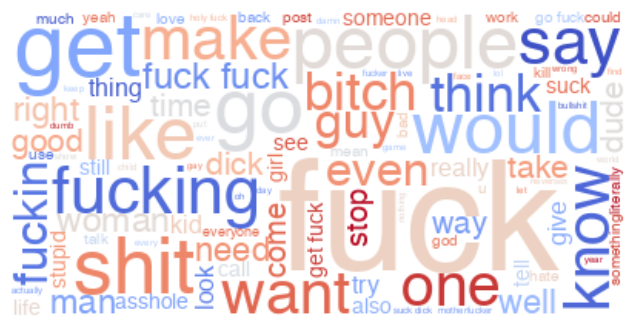

In [38]:
top_toxic_real = word_cloud(df_real, "std_body", "toxicity", 
                       top = 10000, max_words = 100, 
                       stopwords = stop_words, color = "coolwarm")

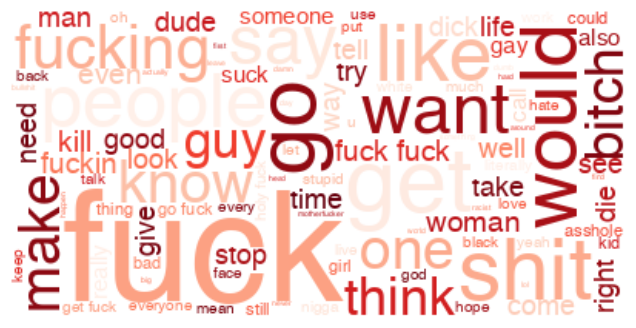

In [39]:
top_sev_toxic_real = word_cloud(df_real, "std_body", "severe_toxicity", 
                           top = 10000, max_words = 100, 
                           stopwords = stop_words, color = "Reds")

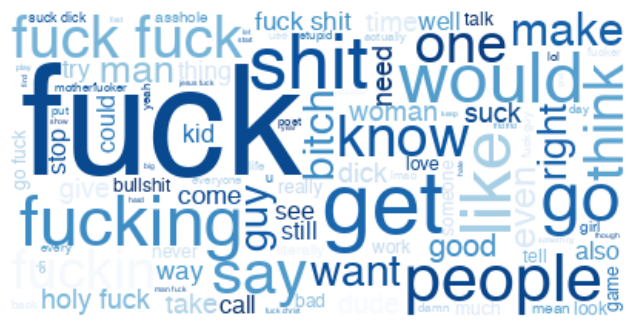

In [62]:
top_obscene_real = word_cloud(df_real, "std_body", "obscene", 
                         top = 10000, max_words = 100, 
                         stopwords = stop_words, color = "Blues")

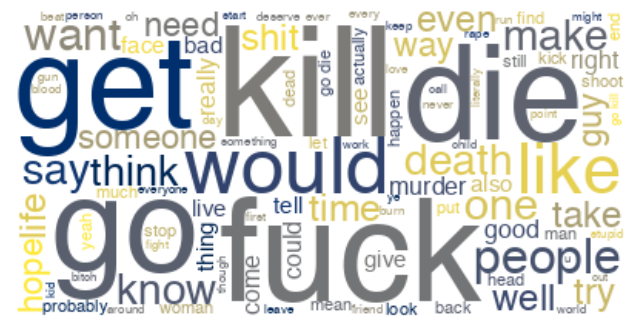

In [61]:
top_threat_real = word_cloud(df_real, "std_body", "threat", 
                        top = 10000, max_words = 100, 
                        stopwords = stop_words, color = "cividis")

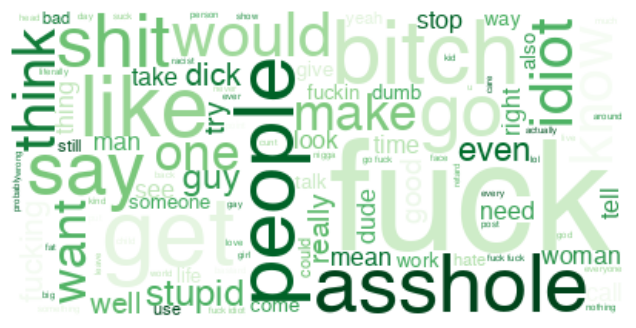

In [56]:
top_insult_real = word_cloud(df_real, "std_body", "insult", 
                        top = 10000, max_words = 100, 
                        stopwords = stop_words, color = "Greens")

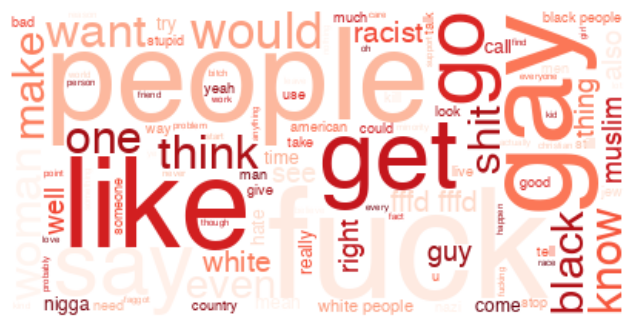

In [55]:
top_idattack_real = word_cloud(df_real, "std_body", "identity_attack", 
                          top = 10000, max_words = 100, 
                          stopwords = stop_words, color = "Reds")

In [24]:
# top terms for each type of toxicity
print(f"Top words for toxic:\n{top_toxic_real}\n")
print(f"Top words for sev_toxic:\n{top_sev_toxic_real}\n")
print(f"Top words for threat:\n{top_threat_real}\n")
print(f"Top words for obscene:\n{top_obscene_real}\n")
print(f"Top words for insult:\n{top_insult_real}\n")
print(f"Top words for idattack:\n{top_idattack_real}\n")

Top words for toxic:
{'go', 'one', 'say', 'dude', 'know', 'well', 'fucking', 'shit', 'man', 'take', 'good', 'guy', 'think', 'fuckin', 'want', 'make', 'stop', 'right', 'time', 'fuck', 'people', 'dick', 'get', 'need', 'even', 'woman', 'would', 'bitch', 'like'}

Top words for sev_toxic:
{'go', 'one', 'kill', 'say', 'know', 'well', 'fucking', 'shit', 'man', 'take', 'good', 'try', 'guy', 'think', 'fuckin', 'want', 'make', 'right', 'time', 'fuck', 'people', 'dick', 'get', 'need', 'even', 'woman', 'would', 'bitch', 'like'}

Top words for threat:
{'go', 'one', 'die', 'kill', 'say', 'know', 'well', 'shit', 'take', 'try', 'good', 'life', 'think', 'guy', 'someone', 'want', 'make', 'way', 'right', 'time', 'fuck', 'people', 'get', 'need', 'death', 'even', 'would', 'hope', 'really', 'like'}

Top words for obscene:
{'go', 'one', 'holy fuck', 'give', 'fuck shit', 'say', 'dude', 'know', 'fucking', 'shit', 'man', 'suck', 'take', 'good', 'guy', 'think', 'fuckin', 'want', 'make', 'right', 'time', 'fuck', 

In [25]:
# top toxic terms for the real data
toxic_terms_real = top_toxic_real | top_sev_toxic_real | top_obscene_real | top_threat_real | top_insult_real | top_idattack_real

##### Simulated data before moderation

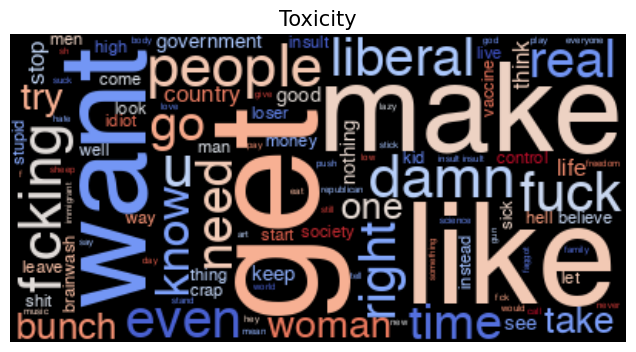

In [26]:
top_toxic_bef = word_cloud(df_bef, "std_body", "toxicity", 
                       top = 200, max_words = 100, 
                       stopwords = stop_words, color = "coolwarm")

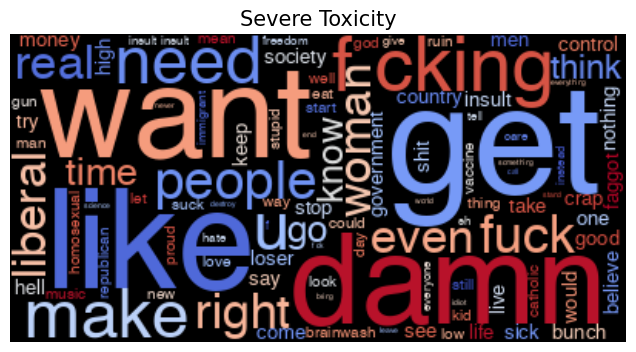

In [27]:
top_sev_toxic_bef = word_cloud(df_bef, "std_body", "severe_toxicity", 
                           top = 200, max_words = 100, 
                           stopwords = stop_words, color = "coolwarm")

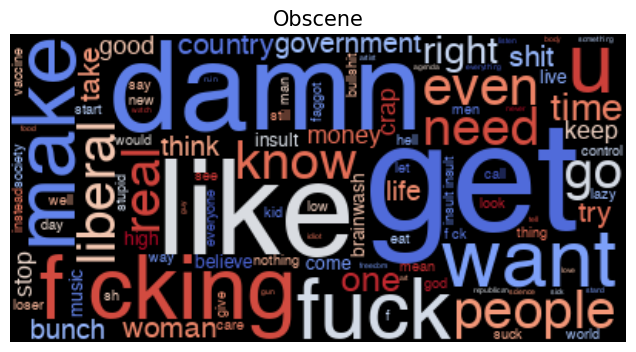

In [28]:
top_obscene_bef = word_cloud(df_bef, "std_body", "obscene", 
                         top = 200, max_words = 100, 
                         stopwords = stop_words, color = "coolwarm")

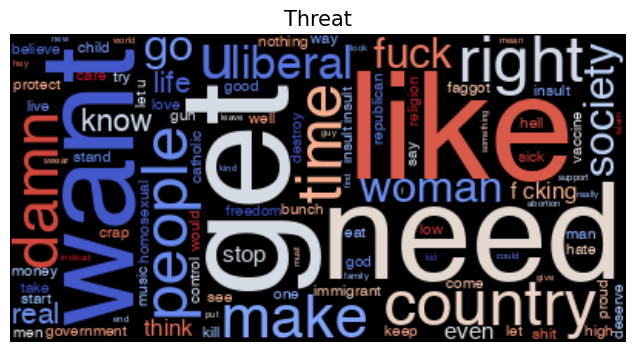

In [29]:
top_threat_bef = word_cloud(df_bef, "std_body", "threat", 
                        top = 200, max_words = 100, 
                        stopwords = stop_words, color = "coolwarm")

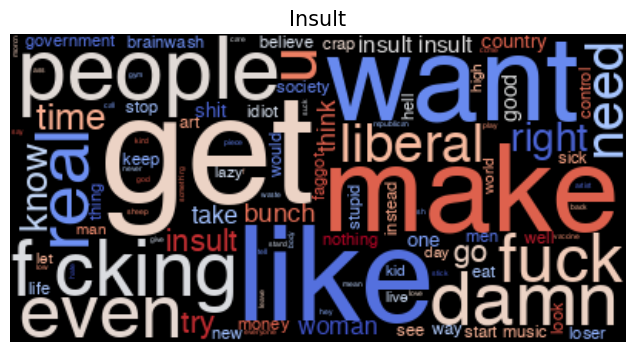

In [30]:
top_insult_bef = word_cloud(df_bef, "std_body", "insult", 
                        top = 200, max_words = 100, 
                        stopwords = stop_words, color = "coolwarm")

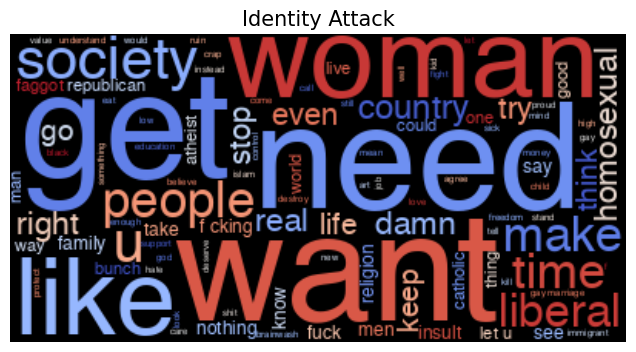

In [31]:
top_idattack_bef = word_cloud(df_bef, "std_body", "identity_attack", 
                          top = 200, max_words = 100, 
                          stopwords = stop_words, color = "coolwarm")

In [32]:
# top terms for each type of toxicity
print(f"Top words for toxic:\n{top_toxic_bef}\n")
print(f"Top words for sev_toxic:\n{top_sev_toxic_bef}\n")
print(f"Top words for threat:\n{top_threat_bef}\n")
print(f"Top words for obscene:\n{top_obscene_bef}\n")
print(f"Top words for insult:\n{top_insult_bef}\n")
print(f"Top words for idattack:\n{top_idattack_bef}\n")

Top words for toxic:
{'go', 'one', 'know', 'bunch', 'take', 'try', 'good', 'life', 'think', 'want', 'liberal', 'make', 'country', 'stop', 'real', 'f cking', 'right', 'time', 'damn', 'fuck', 'keep', 'people', 'government', 'get', 'need', 'u', 'even', 'nothing', 'woman', 'like'}

Top words for sev_toxic:
{'go', 'one', 'know', 'bunch', 'take', 'try', 'life', 'think', 'society', 'want', 'liberal', 'make', 'country', 'stop', 'real', 'f cking', 'crap', 'right', 'time', 'damn', 'fuck', 'people', 'get', 'need', 'u', 'even', 'control', 'nothing', 'woman', 'like'}

Top words for threat:
{'go', 'immigrant', 'know', 'take', 'good', 'try', 'life', 'society', 'think', 'want', 'liberal', 'make', 'country', 'stop', 'real', 'f cking', 'right', 'time', 'damn', 'fuck', 'keep', 'people', 'government', 'get', 'need', 'u', 'even', 'nothing', 'woman', 'like'}

Top words for obscene:
{'go', 'one', 'know', 'bunch', 'shit', 'take', 'try', 'good', 'life', 'think', 'want', 'liberal', 'country', 'make', 'real', 'f

In [33]:
# top toxic terms for the simulated data before moderation
toxic_terms_bef = top_toxic_bef | top_sev_toxic_bef | top_obscene_bef | top_threat_bef | top_insult_bef | top_idattack_bef

##### Comparison Real vs Simulated

In [34]:
print(f"Shared toxic terms: {toxic_terms_real & toxic_terms_bef}")
print(f"Only in real data: {toxic_terms_real - toxic_terms_bef}")
print(f"Only in simulated data: {toxic_terms_bef - toxic_terms_real}")

Shared toxic terms: {'go', 'one', 'say', 'know', 'shit', 'take', 'good', 'try', 'life', 'think', 'want', 'make', 'stop', 'right', 'time', 'fuck', 'people', 'get', 'need', 'even', 'woman', 'like'}
Only in real data: {'fuck shit', 'die', 'black', 'holy fuck', 'give', 'kill', 'dude', 'well', 'fucking', 'nigga', 'racist', 'man', 'suck', 'would', 'idiot', 'stupid', 'call', 'also', 'guy', 'fuckin', 'someone', 'see', 'way', 'white', 'dick', 'gay', 'death', 'asshole', 'thing', 'muslim', 'hope', 'bitch', 'really'}
Only in simulated data: {'immigrant', 'homosexual', 'bunch', 'insult insult', 'society', 'liberal', 'country', 'insult', 'religion', 'real', 'f cking', 'crap', 'damn', 'keep', 'government', 'u', 'control', 'nothing', 'money', 'family'}


In [35]:
# union of most frequent toxic-related terms for real and simulated
freq_toxic_terms = list(toxic_terms_real | toxic_terms_bef)

print(f"Number of toxic terms found exclusively in the real data: {len(toxic_terms_real-toxic_terms_bef)}")
print(f"Number of toxic terms found exclusively in the simulated before mod data: {len(toxic_terms_bef-toxic_terms_real)}")
print(f"Number of toxic terms found across datasets: {len(freq_toxic_terms)}")

Number of toxic terms found exclusively in the real data: 33
Number of toxic terms found exclusively in the simulated before mod data: 20
Number of toxic terms found across datasets: 75


## Toxic TF-IDF
- We vectorize all datasets, real and simulated (before mode, ofsa, neutral, empathizing, prescriptive)
- we use TF-IDF since it maintains interpretability for further analyses
- while Word2Vec, Fasttext, transformer-based embeddings capture semantics but lack transparency

##### Load simulated after moderation datasets with toxicity

In [36]:
# comments to vectorize
text_col = "std_body"

We use TF-IDF to extract the relevancy of the most frequent toxic terms, found using the word clouds on different types of toxicities, and across real and simulated before moderation data

We vectorize all datasets according to the same vocabulary, to then make comparative analyses

In [37]:
# vectorize the comments in each dataset considering only toxic vocabulary
# real data
toxic_tfidf_vectorize(df_real, text_col, freq_toxic_terms)

# simulated data
# before moderation
toxic_tfidf_vectorize(df_bef, text_col, freq_toxic_terms)
# ofsa
toxic_tfidf_vectorize(df_ofsa, text_col, freq_toxic_terms)
# neutral
toxic_tfidf_vectorize(df_neut, text_col, freq_toxic_terms)
# empathizing
toxic_tfidf_vectorize(df_emp, text_col, freq_toxic_terms)
# prescriptive
toxic_tfidf_vectorize(df_pres, text_col, freq_toxic_terms)

In [38]:
# shapes after vectorization
print(f"Shape of real data: {df_real.shape}")
print(f"Shape of before data: {df_bef.shape}")
print(f"Shape of ofsa data: {df_ofsa.shape}")
print(f"Shape of neutral data: {df_neut.shape}")
print(f"Shape of empathizing data: {df_emp.shape}")
print(f"Shape of prescriptive data: {df_pres.shape}")

Shape of real data: (2710671, 136)
Shape of before data: (3131, 141)
Shape of ofsa data: (2579, 141)
Shape of neutral data: (2620, 141)
Shape of empathizing data: (2624, 141)
Shape of prescriptive data: (2599, 141)


In [39]:
df_real.head(1)

,author,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,score,subreddit,id,parent_id,date,time_of_day,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,is_toxic,go,holy fuck,homosexual,say,know,well,bunch,shit,man,racist,would,stupid,also,guy,liberal,make,country,religion,real,crap,right,keep,people,dick,need,asshole,nothing,woman,bitch,one,give,fuck shit,die,black,immigrant,kill,dude,fucking,nigga,suck,take,good,try,idiot,call,insult insult,life,think,society,fuckin,someone,want,stop,see,f cking,way,time,damn,white,fuck,government,get,u,gay,even,death,thing,control,money,muslim,family,hope,really,like
0,MetricExpansion,Those stats come from the test. [Echoing the c...,stats come test echo comment make related ques...,m,23.0,high,very low,very low,low,medium,6.0,mbti,d7vkyrf,t3_53plrw,2016-09-21,03:41:38,25,4,8,0,0,0,,,0.03,0.03,0.0,0.21,0.07,0.41,0.07,0.0,0.0,0.07,0.108117,0.524675,0.135211,0.087877,0.124749,45.59,13.2,14.64,14.3,14.7,11.09,8.62,12.4,30.0,160,94,19,37,31,87,85,0.000694,0.000113,0.000177,0.000109,0.0,0.000141,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343795,0.0,0.515988,0.0,0.0,0.0,0.0,0.0


In [40]:
df_bef.head(1)

,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,thread_id,node_id,parent_id,root_id,race,income,education,sex_orientation,political_leaning,religion,simulate_seed,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,is_toxic,go,holy fuck,homosexual,say,know,well,bunch,shit,man,racist,would,stupid,also,guy,liberal,make,country,real,crap,right,keep,people,dick,need,asshole,nothing,woman,bitch,one,give,fuck shit,die,black,immigrant,kill,dude,fucking,nigga,suck,take,good,try,idiot,call,insult insult,life,think,society,fuckin,someone,want,stop,see,f cking,way,time,damn,white,fuck,government,get,u,gay,even,death,thing,control,money,muslim,family,hope,really,like
0,joylukclub,2,Since I strongly lean towards the republican s...,since strongly lean towards republican side wh...,f,21,medium,very high,very low,low,very high,1,2,1.0,1,white,low,high school,heterosexual,republican,0.0,5,7,2,0,0,0,0,,,0.07,0.07,0.0,0.07,0.07,0.2,0.27,0.07,0.07,0.07,-0.052381,0.554762,0.205373,0.168915,0.189136,45.59,13.2,17.26,0.0,14.4,10.62,10.16,17.25,15.0,52,45,8,14,6,28,22,0.000711,0.000118,0.000166,0.000128,0.0,0.00016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.603497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.797366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Add comment ID to real users dataset
- we moved this before in the data preparation phase, since it should be done there

In [41]:
df_real.insert(loc = 1, column = "comment_id", value = range(len(df_real)))

##### Flag Real vs Simulated
- add flag to distinguish between real (1) and simulated (0) data

In [42]:
# real
df_real["is_real"] = 1
# simulated
df_bef["is_real"] = 0
df_ofsa["is_real"] = 0
df_neut["is_real"] = 0
df_emp["is_real"] = 0
df_pres["is_real"] = 0

In [43]:
df_real.head(1)

,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,score,subreddit,id,parent_id,date,time_of_day,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,is_toxic,go,holy fuck,homosexual,say,know,well,bunch,shit,man,racist,would,stupid,also,guy,liberal,make,country,religion,real,crap,right,keep,people,dick,need,asshole,nothing,woman,bitch,one,give,fuck shit,die,black,immigrant,kill,dude,fucking,nigga,suck,take,good,try,idiot,call,insult insult,life,think,society,fuckin,someone,want,stop,see,f cking,way,time,damn,white,fuck,government,get,u,gay,even,death,thing,control,money,muslim,family,hope,really,like,is_real
0,MetricExpansion,0,Those stats come from the test. [Echoing the c...,stats come test echo comment make related ques...,m,23.0,high,very low,very low,low,medium,6.0,mbti,d7vkyrf,t3_53plrw,2016-09-21,03:41:38,25,4,8,0,0,0,,,0.03,0.03,0.0,0.21,0.07,0.41,0.07,0.0,0.0,0.07,0.108117,0.524675,0.135211,0.087877,0.124749,45.59,13.2,14.64,14.3,14.7,11.09,8.62,12.4,30.0,160,94,19,37,31,87,85,0.000694,0.000113,0.000177,0.000109,0.0,0.000141,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343795,0.0,0.515988,0.0,0.0,0.0,0.0,0.0,1


In [44]:
df_bef.head(1)

,author,comment_id,llm_body,std_body,gender,age,openness,conscientiousness,extraversion,agreeableness,neuroticism,thread_id,node_id,parent_id,root_id,race,income,education,sex_orientation,political_leaning,religion,simulate_seed,num_punct,num_sents,num_words_upp,num_emoji,num_emoji_pos,num_emoji_neg,emoji_unique,emoji_list,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,polarity,subjectivity,valence,arousal,dominance,flesch,flesch_kincaid,fog,smog,ari,coleman_liau,dale_chall,linsear,difficult_words,num_words,num_words_unique,num_words_adj,num_words_noun,num_words_verb,num_words_lex,num_stopw,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,is_toxic,go,holy fuck,homosexual,say,know,well,bunch,shit,man,racist,would,stupid,also,guy,liberal,make,country,real,crap,right,keep,people,dick,need,asshole,nothing,woman,bitch,one,give,fuck shit,die,black,immigrant,kill,dude,fucking,nigga,suck,take,good,try,idiot,call,insult insult,life,think,society,fuckin,someone,want,stop,see,f cking,way,time,damn,white,fuck,government,get,u,gay,even,death,thing,control,money,muslim,family,hope,really,like,is_real
0,joylukclub,2,Since I strongly lean towards the republican s...,since strongly lean towards republican side wh...,f,21,medium,very high,very low,low,very high,1,2,1.0,1,white,low,high school,heterosexual,republican,0.0,5,7,2,0,0,0,0,,,0.07,0.07,0.0,0.07,0.07,0.2,0.27,0.07,0.07,0.07,-0.052381,0.554762,0.205373,0.168915,0.189136,45.59,13.2,17.26,0.0,14.4,10.62,10.16,17.25,15.0,52,45,8,14,6,28,22,0.000711,0.000118,0.000166,0.000128,0.0,0.00016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.603497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.797366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Store vectorized datasets

In [45]:
# real data
df_real.to_csv("../final_data/pandora/PANDORA_full.csv", index = False, encoding = "utf-8")

In [46]:
# simulated
# data before moderation
df_bef.to_csv("../final_data/simulator/exante/before_mod/SIMULATOR_exante_bef_full.csv", index = False, encoding = "utf-8")
# ofsa
df_ofsa.to_csv("../final_data/simulator/exante/after_mod/SIMULATOR_exante_ofsa_full.csv", index = False, encoding = "utf-8")
# neutral
df_neut.to_csv("../final_data/simulator/exante/after_mod/SIMULATOR_exante_neut_full.csv", index = False, encoding = "utf-8")
# empathizing
df_emp.to_csv("../final_data/simulator/exante/after_mod/SIMULATOR_exante_emp_full.csv", index = False, encoding = "utf-8")
# prescriptive
df_pres.to_csv("../final_data/simulator/exante/after_mod/SIMULATOR_exante_pres_full.csv", index = False, encoding = "utf-8")